In [ ]:
%pip install httpx pandas pandas_ta matplotlib seaborn plotly requests beautifulsoup4 lxml mplfinance finnhub-python binance python-binance pandasai scikit-learn numpy polars rich

In [ ]:
# Données exemple: Date, Ouverture, Haut, Bas, Clôture
import pandas as pd
donnees = pd.DataFrame({
    'Date': ['2021-01-01', '2021-01-02', '2021-01-03'],
    'Ouverture': [100, 110, 105],
    'Haut': [110, 120, 115],
    'Bas': [90, 100, 95],
    'Clôture': [105, 115, 100]
})

In [ ]:
donnees

In [ ]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Données exemple: Date, Ouverture, Haut, Bas, Clôture
donnees = pd.DataFrame({
    'Date': ['2021-01-01', '2021-01-02', '2021-01-03'],
    'Ouverture': [100, 110, 105],
    'Haut': [110, 120, 115],
    'Bas': [90, 100, 95],
    'Clôture': [105, 115, 100]
})
donnees['Date'] = pd.to_datetime(donnees['Date'])
donnees['Date'] = donnees['Date'].apply(mdates.date2num)

fig, ax = plt.subplots()
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
candlestick_ohlc(ax, donnees.values, width=0.6, colorup='g', colordown='r')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Données exemple
donnees = pd.DataFrame({'Prix': [100, 110, 105, 115, 120, 130, 125, 135]})
donnees['MMS_3'] = donnees['Prix'].rolling(window=3).mean()
donnees['MME_3'] = donnees['Prix'].ewm(span=3, adjust=False).mean()

plt.plot(donnees['Prix'], label='Prix')
plt.plot(donnees['MMS_3'], label='MMS 3 périodes')
plt.plot(donnees['MME_3'], label='MME 3 périodes')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Données exemple
dates = ['2021-01-01', '2021-01-02', '2021-01-03']
volume = [1000, 1500, 900]

plt.bar(dates, volume)
plt.xlabel('Dates')
plt.ylabel('Volume')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
donnees = pd.DataFrame({'Clôture': [100, 110, 105, 115, 120, 130, 125, 135]})

# Calculate RSI (simplified)
delta = donnees['Clôture'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=3, min_periods=1).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=3, min_periods=1).mean()
rs = gain / loss
donnees['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD (simplified)
donnees['EMA_12'] = donnees['Clôture'].ewm(span=12, adjust=False).mean()
donnees['EMA_26'] = donnees['Clôture'].ewm(span=26, adjust=False).mean()
donnees['MACD'] = donnees['EMA_12'] - donnees['EMA_26']

# Plotting
plt.subplot(2, 1, 1)
plt.plot(donnees['Clôture'], label='Prix')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(donnees['RSI'], label='RSI')
plt.plot(donnees['MACD'], label='MACD')
plt.legend()
plt.show()

In [ ]:
import requests
import json
import pandas as pd

def fetch_data_from_api(api_url):
    try:
        response = requests.get(api_url)
        response.raise_for_status()  # Raise HTTPError for bad responses
        data = json.loads(response.text)
        historical_data = data['historical']
        return pd.DataFrame(historical_data)
    except requests.HTTPError as e:
        print(f"Failed to fetch data from API. HTTPError: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Replace 'YOUR_API_KEY' with your Financial Modeling Prep API key
url = "https://financialmodelingprep.com/api/v3/historical-price-full/AAPL?apikey=<YOUR_API_KEY>"

# Fetch data from API
df = fetch_data_from_api(url)

# Fallback to CSV if API call fails
if df is None:
    csv_fallback_path = './4.0-visualisation/apple_stock_data.csv'  # Change this to your fallback CSV path
    print(f"Falling back to CSV file at {csv_fallback_path}")
    df = pd.read_csv(csv_fallback_path)

# Save DataFrame to CSV file (if fetched from API)
if df is not None:
    csv_file_path = './4.0-visualisation/apple_stock_data.csv'  # Change this to your desired path
    df.to_csv(csv_file_path, index=False)
    print(f"Data has been saved to {csv_file_path}")

In [21]:
import pandas_ta as ta

# Calculate Simple and Exponential Moving Averages
df['SMA_20'] = ta.sma(df['close'], 20)
df['EMA_20'] = ta.ema(df['close'], 20)

# Calculate RSI
df['RSI'] = ta.rsi(df['close'])

# Calculate MACD
macd = ta.macd(df['close'])
for col in macd.columns:
    df[f"MACD_{col}"] = macd[col]

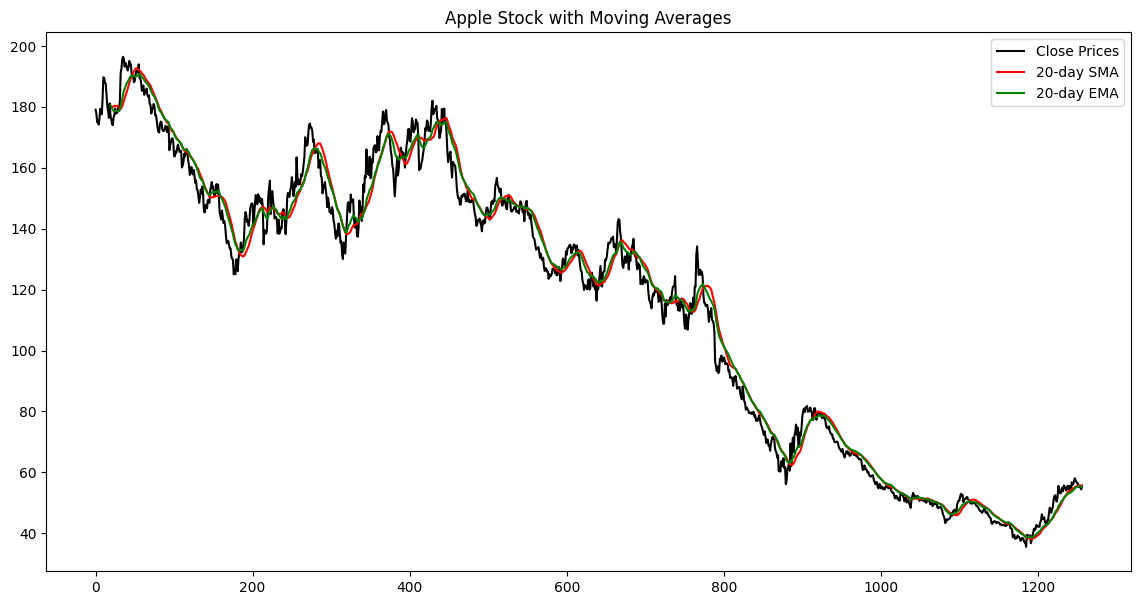

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt


# Visualizing Moving Averages
plt.figure(figsize=(14, 7))
plt.title('Apple Stock with Moving Averages')
plt.plot(df['close'], label='Close Prices', color='black')
plt.plot(df['SMA_20'], label='20-day SMA', color='red')
plt.plot(df['EMA_20'], label='20-day EMA', color='green')
plt.legend()
plt.show()

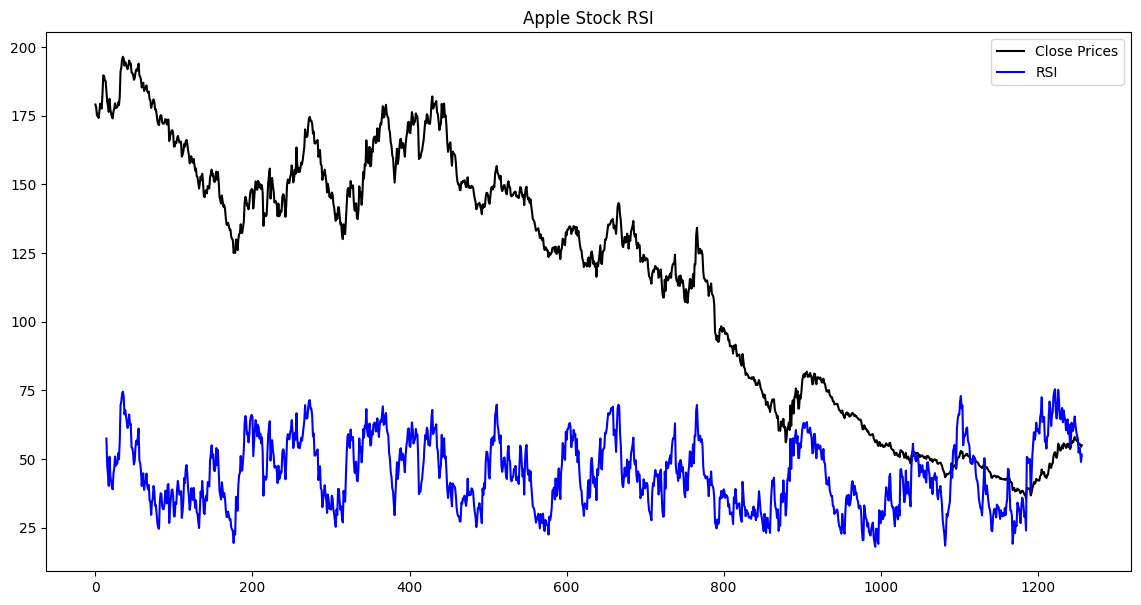

In [23]:
# Visualizing RSI
plt.figure(figsize=(14, 7))
plt.title('Apple Stock RSI')
plt.plot(df['close'], label='Close Prices', color='black')
plt.plot(df['RSI'], label='RSI', color='blue')
plt.legend()
plt.show()

In [ ]:
# Visualizing MACD
plt.figure(figsize=(14, 7))
plt.title('Apple Stock MACD')
plt.plot(df['close'], label='Close Prices', color='black')
plt.plot(df['MACD'], label='MACD', color='purple')
plt.legend()
plt.show()